In [2]:
from itertools import product
from itertools import combinations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:


#results_csv_file_path = "RESULTS_NSTEVENS_CumCondCount=89844_2024-01-16.csv"
results_csv_file_path = "RESULTS_BLCKMRKT_CumCondCount=16_2024-01-17.csv"

response = pd.read_csv(f"~/Downloads/exp1/{results_csv_file_path}")
response


,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,55,50,0.2,TT,16.579823
1,55,80,0.2,TT,10.763616
2,55,50,0.2,AC,23.264087
3,55,80,0.2,AC,15.991807
4,55,50,0.4,TT,17.032202
...,...,...,...,...,...
1595,95,80,0.2,AC,20.427475
1596,95,50,0.4,TT,14.586407
1597,95,80,0.4,TT,14.343198
1598,95,50,0.4,AC,19.429247


In [4]:


# Rename the columns so that you can use the dataframe in linear regression analysis
response = response.rename(
    columns={
        column : column.split(".")[1] for column in response.columns
    }
)
response.columns
response.sort_values(by=['Time']).head(20)


,Length,Score,Size,Type,Time
369,55,80,0.2,TT,9.151320
81,55,80,0.2,TT,9.337022
693,55,80,0.4,TT,9.989945
1041,55,80,0.2,TT,10.073641
1073,55,80,0.2,TT,10.103900
549,55,80,0.4,TT,10.242189
449,55,80,0.2,TT,10.245571
197,55,80,0.4,TT,10.255869
229,55,80,0.4,TT,10.277155
373,55,80,0.4,TT,10.339103


In [5]:
import statsmodels.formula.api as smf

model = smf.ols('Time ~ C(Size) * C(Score) * C(Length) * C(Type)', data = response).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:43:50   Log-Likelihood:                -2234.9
No. Observations:                1600   AIC:                             4502.
Df Residuals:                    1584   BIC:                             4588.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      22.4365      0.098    228.239      0.000      22.244      22.629
C(Size)[T.0.4]                                                 -0.0086      0.139     -0.062      0.951      -0.281       0.264
C(Score)[T.80]                                                 -5.7283      0.139    -41.205      0.000      -6.001      -5.456
C(Length)[T.95]                                                -2.0421      0.139    -14.689      0.000      -2.315      -1.769
C(Type)[T.TT]                                                  -5.0041      0.139    -35.995      0.000      -5.277      -4.731
C(Size)[T.0.4]:C(Score)[T.80]                                   0.0177      0.197      0.090      0.928      -0.368       0.403
C(Size)[T.0.4]:C(Length)[T.95]                                 -0.0515      0.197     -0.262      0.794      -0.437       0.334
C(Score)[T.80]:C(Length)[T.95]                                  4.9827      0.197     25.344      0.000       4.597       5.368
C(Size)[T.0.4]:C(Type)[T.TT]                                    0.0608      0.197      0.309      0.757      -0.325       0.446
C(Score)[T.80]:C(Type)[T.TT]                                    0.2080      0.197      1.058      0.290      -0.178       0.594
C(Length)[T.95]:C(Type)[T.TT]                                  -0.1185      0.197     -0.603      0.547      -0.504       0.267
C(Size)[T.0.4]:C(Score)[T.80]:C(Length)[T.95]                   0.0786      0.278      0.283      0.777      -0.467       0.624
C(Size)[T.0.4]:C(Score)[T.80]:C(Type)[T.TT]                    -0.0095      0.278     -0.034      0.973      -0.555       0.536
C(Size)[T.0.4]:C(Length)[T.95]:C(Type)[T.TT]                    0.2163      0.278      0.778      0.437      -0.329       0.762
C(Score)[T.80]:C(Length)[T.95]:C(Type)[T.TT]                   -0.1714      0.278     -0.617      0.538      -0.717       0.374
C(Size)[T.0.4]:C(Score)[T.80]:C(Length)[T.95]:C(Type)[T.TT]    -0.3327      0.393     -0.846      0.398      -1.104       0.439
==============================================================================
Omnibus:                        3.848   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.440
Skew:                           0.047   Prob(JB):                        0.179
Kurtosis:                       2.794   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U
def catelowhigh(x):
    return np.where(x == 'TT', -1, 1)
    

x1 = convertNtoC(U=response['Length'], UH=95, UL=55)
x2 = convertNtoC(U=response['Score'], UH=80, UL=50)
x3 = catelowhigh(x=response['Type'])
x4 = convertNtoC(U=response['Size'], UH=0.4, UL=0.2)

response['x1'] = x1
response['x2'] = x2
response['x3'] = x3
response['x4'] = x4
response.groupby(['Length','Score', 'Type']).mean()

Size       Time   x1   x2   x3            x4
Length Score Type                                              
55     50    AC     0.3  22.432221 -1.0 -1.0  1.0 -2.220446e-16
             TT     0.3  17.458577 -1.0 -1.0 -1.0 -2.220446e-16
       80    AC     0.3  16.712748 -1.0  1.0  1.0 -2.220446e-16
             TT     0.3  11.942358 -1.0  1.0 -1.0 -2.220446e-16
95     50    AC     0.3  20.364413  1.0 -1.0  1.0 -2.220446e-16
             TT     0.3  15.380411  1.0 -1.0 -1.0 -2.220446e-16
       80    AC     0.3  19.666938  1.0  1.0  1.0 -2.220446e-16
             TT     0.3  14.548411  1.0  1.0 -1.0 -2.220446e-16

In [7]:
model = smf.ols('Time ~ x1 * x2 * x3 * x4', data = response).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:43:50   Log-Likelihood:                -2234.9
No. Observations:                1600   AIC:                             4502.
Df Residuals:                    1584   BIC:                             4588.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.3133      0.025    704.486      0.000      17.265      17.361
x1              0.1768      0.025      7.193      0.000       0.129       0.225
x2             -1.5956      0.025    -64.928      0.000      -1.644      -1.547
x1:x2           1.2133      0.025     49.369      0.000       1.165       1.261
x3              2.4808      0.025    100.946      0.000       2.433       2.529
x1:x3           0.0448      0.025      1.823      0.068      -0.003       0.093
x2:x3          -0.0086      0.025     -0.350      0.727      -0.057       0.040
x1:x2:x3        0.0422      0.025      1.718      0.086      -0.006       0.090
x4              0.0173      0.025      0.705      0.481      -0.031       0.066
x1:x4           0.0032      0.025      0.130      0.896      -0.045       0.051
x2:x4          -0.0077      0.025     -0.315      0.753      -0.056       0.040
x1:x2:x4       -0.0110      0.025     -0.446      0.655      -0.059       0.037
x3:x4          -0.0203      0.025     -0.824      0.410      -0.068       0.028
x1:x3:x4       -0.0062      0.025     -0.254      0.799      -0.054       0.042
x2:x3:x4        0.0220      0.025      0.895      0.371      -0.026       0.070
x1:x2:x3:x4     0.0208      0.025      0.846      0.398      -0.027       0.069
==============================================================================
Omnibus:                        3.848   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.440
Skew:                           0.047   Prob(JB):                        0.179
Kurtosis:                       2.794   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from scipy import stats

two = response[response["Size"] == 0.2]["Time"]
four = response[response["Size"] == 0.4]["Time"]

## check if sign dif mean time

t = np.var(two, ddof = 1)/np.var(four, ddof = 1)
print("t =", t)

pv = stats.f.cdf(t, dfn=799, dfd=799) + 1 - stats.f.cdf(1/t, dfn=799, dfd=799)
print("p-value =", pv)


## Not significantly different

t = 1.0255474169166936
p-value = 1.2784722826550294


In [9]:

t, pv = stats.ttest_ind(two, four, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -0.20738946902798172
p-value = 0.5821339346743041


In [10]:
## Tile Size not needed in model

import statsmodels.formula.api as smf
import statsmodels.api as sm
model_noint = smf.ols('Time ~ C(Size) + C(Score) + C(Length) + C(Type)', data = response).fit()

model_nosize = smf.ols('Time ~  C(Score) + C(Length) + C(Type)', data = response).fit()
sm.stats.anova_lm(model_nosize, model_noint)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1596.0,3895.111648,0.0,NaN,NaN,NaN
1,1595.0,3894.630795,1.0,0.480853,0.196928,0.657272


In [11]:
model_int = smf.ols('Time ~ C(Size) * C(Score) * C(Length) * C(Type)', data = response).fit()

model_nosize_int = smf.ols('Time ~  C(Score) * C(Length) * C(Type)', data = response).fit()
sm.stats.anova_lm(model_nosize_int, model_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1592.0,1533.661208,0.0,NaN,NaN,NaN
1,1584.0,1530.691450,8.0,2.969758,0.384148,0.929497


In [12]:
# Interactions are good

model_nosize_wint = smf.ols('Time ~ C(Score) * C(Length) * C(Type)', data = response).fit()
model_noint = smf.ols('Time ~ C(Score) + C(Length) + C(Type)', data = response).fit()
sm.stats.anova_lm(model_noint, model_nosize_wint)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1596.0,3895.111648,0.0,NaN,NaN,NaN
1,1592.0,1533.661208,4.0,2361.45044,612.819357,2.959947e-320


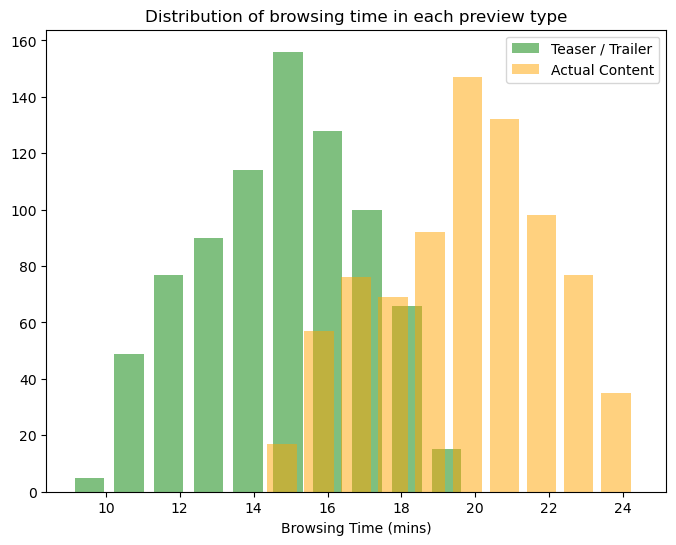

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

teaser_trailer = response[response['Type'] == 'TT']
actual_content = response[response['Type'] == 'AC']
ax.hist(teaser_trailer.Time, width=0.8, color='green', alpha=0.5, label='Teaser / Trailer')
ax.hist(actual_content.Time, width=0.8, color='orange', alpha=0.5, label='Actual Content')
ax.set_xlabel("Browsing Time (mins)")
ax.set_title("Distribution of browsing time in each preview type")
ax.legend()
plt.show()

In [14]:
TT = response[response["Type"] == "TT"]["Time"]
AC = response[response["Type"] != "TT"]["Time"]

In [15]:

## check if TT sign better than AC mean time

t = np.var(TT, ddof = 1)/np.var(AC, ddof = 1)
print("t =", t)

pv = stats.f.cdf(t, dfn=799, dfd=799) + 1 - stats.f.cdf(1/t, dfn=799, dfd=799)
print("p-value =", pv)


t = 0.9383576824641993
p-value = 0.36872685294801444


In [16]:
t, pv = stats.ttest_ind(TT, AC, equal_var = False, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -44.2983518140121
p-value = 1.0


In [17]:
## 90th percentile

TTQ= TT[TT <= TT.quantile(0.9)]
ACQ= AC[AC >= AC.quantile(0.9)]


In [18]:
t = np.var(TTQ, ddof = 1)/np.var(ACQ, ddof = 1)
print("t =", t)

pv = stats.f.cdf(t, dfn=719, dfd=719) + 1 - stats.f.cdf(1/t, dfn=719, dfd=719)
print("p-value =", pv)

t = 20.14208090575459
p-value = 2.0


In [19]:
t, pv = stats.ttest_ind(ACQ, TTQ, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 40.743280880983825
p-value = 1.9528969901204825e-197


In [20]:
## dont need any Type interactions

model_nointwtype = smf.ols('Time ~ C(Score) * C(Length) + C(Type)', data = response).fit()
model_nointwtype.summary()
sm.stats.anova_lm(model_nointwtype, model_nosize_wint)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1595.0,1539.844632,0.0,NaN,NaN,NaN
1,1592.0,1533.661208,3.0,6.183424,2.139545,0.093373


In [21]:
response.groupby(["Type","Score", "Length", "Size"]).mean("Time")

Time   x1   x2   x3   x4
Type Score Length Size                               
AC   50    55     0.2   22.436523 -1.0 -1.0  1.0 -1.0
                  0.4   22.427919 -1.0 -1.0  1.0  1.0
           95     0.2   20.394448  1.0 -1.0  1.0 -1.0
                  0.4   20.334378  1.0 -1.0  1.0  1.0
     80    55     0.2   16.708207 -1.0  1.0  1.0 -1.0
                  0.4   16.717288 -1.0  1.0  1.0  1.0
           95     0.2   19.648827  1.0  1.0  1.0 -1.0
                  0.4   19.685049  1.0  1.0  1.0  1.0
TT   50    55     0.2   17.432471 -1.0 -1.0 -1.0 -1.0
                  0.4   17.484683 -1.0 -1.0 -1.0  1.0
           95     0.2   15.271880  1.0 -1.0 -1.0 -1.0
                  0.4   15.488941  1.0 -1.0 -1.0  1.0
     80    55     0.2   11.912181 -1.0  1.0 -1.0 -1.0
                  0.4   11.972535 -1.0  1.0 -1.0  1.0
           95     0.2   14.562852  1.0  1.0 -1.0 -1.0
                  0.4   14.533971  1.0  1.0 -1.0  1.0

In [22]:
## going to do TT - check those and disregard tile size
response[response["Type"] == "TT"].groupby(["Score", "Length"]).mean("Time")

Size       Time   x1   x2   x3            x4
Score Length                                              
50    55       0.3  17.458577 -1.0 -1.0 -1.0 -2.220446e-16
      95       0.3  15.380411  1.0 -1.0 -1.0 -2.220446e-16
80    55       0.3  11.942358 -1.0  1.0 -1.0 -2.220446e-16
      95       0.3  14.548411  1.0  1.0 -1.0 -2.220446e-16

Lowest is Match 80, length 55 then length 95 with 80

Check closer to 80

65 and 90 Match Score (or 60, 70, 90)


Length looks better shorter

check 45 and 75 (or 40, 60, 75)


40 - 16 = 24 conditions left

In [23]:
results_csv_file_path2 = "RESULTS_BLCKMRKT_CumCondCount=4_2024-01-18.csv"

response2 = pd.read_csv(f"~/Downloads/exp2/{results_csv_file_path2}")
response2


response2 = response2.rename(
    columns={
        column : column.split(".")[1] for column in response2.columns
    }
)
response2.columns
response2.sort_values(by=['Time']).head(20)


,Length,Score,Size,Type,Time
161,75,65,0.2,TT,8.939000
357,75,65,0.2,TT,9.199341
25,75,65,0.2,TT,9.222689
337,75,65,0.2,TT,9.253982
149,75,65,0.2,TT,9.289151
17,75,65,0.2,TT,9.386951
261,75,65,0.2,TT,9.609749
397,75,65,0.2,TT,9.631713
209,75,65,0.2,TT,9.756525
1,75,65,0.2,TT,9.765744


In [24]:
response2.groupby(["Score", "Length"]).mean("Time")

Size       Time
Score Length                 
65    45       0.2  14.302224
      75       0.2  11.135350
90    45       0.2  13.774850
      75       0.2  12.901075

All not much better -- 75 length score 65 slightly lower than w length 55 score 80


score probs needs to be closer to 80 so 70 or 75 and 85 or 95

length greater than 45
maybe between 55 and 75 

so maybe length 65 and something else - maybe 60 and 70


In [25]:
df=pd.concat([response[response["Type"]=='TT'], response2], axis=0)
df["Length"].min()

45

In [26]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U


x1 = convertNtoC(U=df['Length'], UH=95, UL=45)
x2 = convertNtoC(U=df['Score'], UH=90, UL=50)
df['x1'] = x1
df['x2'] = x2
df.groupby(['Length','Score']).mean()

/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/430357270.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Length','Score']).mean()


Size       Time   x1    x2   x3            x4
Length Score                                               
45     65      0.2  14.302224 -1.0 -0.25  NaN           NaN
       90      0.2  13.774850 -1.0  1.00  NaN           NaN
55     50      0.3  17.458577 -0.6 -1.00 -1.0 -2.220446e-16
       80      0.3  11.942358 -0.6  0.50 -1.0 -2.220446e-16
75     65      0.2  11.135350  0.2 -0.25  NaN           NaN
       90      0.2  12.901075  0.2  1.00  NaN           NaN
95     50      0.3  15.380411  1.0 -1.00 -1.0 -2.220446e-16
       80      0.3  14.548411  1.0  0.50 -1.0 -2.220446e-16

In [27]:
len(df)

1200

In [28]:
model = smf.ols('Time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     881.4
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:43:51   Log-Likelihood:                -1713.4
No. Observations:                1200   AIC:                             3439.
Df Residuals:                    1194   BIC:                             3469.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9234      0.078    140.777      0.000      10.771      11.076
x1            -0.2818      0.039     -7.206      0.000      -0.359      -0.205
x2            -1.1022      0.041    -27.031      0.000      -1.182      -1.022
x1:x2          1.9515      0.054     36.339      0.000       1.846       2.057
I(x1 ** 2)     2.6069      0.084     31.180      0.000       2.443       2.771
I(x2 ** 2)     3.0159      0.079     37.937      0.000       2.860       3.172
==============================================================================
Omnibus:                        0.327   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.250
Skew:                           0.027   Prob(JB):                        0.882
Kurtosis:                       3.046   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]

In [30]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Mean Browsing Time is optimized when x1=", x_s[0], "and x2=", x_s[1])

Mean Browsing Time is optimized when x1= [[-0.01632341]] and x2= [[0.18801938]]


In [31]:
xsN_1 = convertCtoN(x = x_s[0],  UH=95, UL=45)
xsN_2 = convertCtoN(x = x_s[1], UH=90, UL=50)
print("Length=", xsN_1, ", Score=", xsN_2)

Length= [[69.59191473]] , Score= [[73.76038767]]


In [32]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(np.exp(eta_s)/(1+np.exp(eta_s)))

[[0.99998005]]


In [33]:
yhat = model.predict(exog=dict(x1=convertNtoC(U = 69.59, UH=95, UL=45), 
                               x2=convertNtoC(U = 73.7,  UH=90, UL=50)))
print(yhat)

0    10.822134
dtype: float64


In [34]:
df.head()

,Length,Score,Size,Type,Time,x1,x2,x3,x4
0,55,50,0.2,TT,16.579823,-0.6,-1.0,-1.0,-1.0
1,55,80,0.2,TT,10.763616,-0.6,0.5,-1.0,-1.0
4,55,50,0.4,TT,17.032202,-0.6,-1.0,-1.0,1.0
5,55,80,0.4,TT,11.022194,-0.6,0.5,-1.0,1.0
8,95,50,0.2,TT,14.126112,1.0,-1.0,-1.0,-1.0


In [35]:
df.drop(columns=['Length', 'Score']).drop_duplicates()

,Size,Type,Time,x1,x2,x3,x4
0,0.2,TT,16.579823,-0.6,-1.00,-1.0,-1.0
1,0.2,TT,10.763616,-0.6,0.50,-1.0,-1.0
4,0.4,TT,17.032202,-0.6,-1.00,-1.0,1.0
5,0.4,TT,11.022194,-0.6,0.50,-1.0,1.0
8,0.2,TT,14.126112,1.0,-1.00,-1.0,-1.0
...,...,...,...,...,...,...,...
395,0.2,TT,14.946795,0.2,1.00,NaN,NaN
396,0.2,TT,15.866244,-1.0,-0.25,NaN,NaN
397,0.2,TT,9.631713,0.2,-0.25,NaN,NaN
398,0.2,TT,12.956459,-1.0,1.00,NaN,NaN


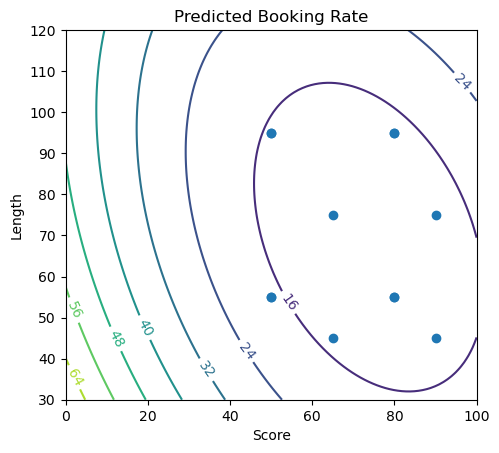

In [36]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30,  UH=95, UL=45), 
                                 convertNtoC(U = 120,  UH=95, UL=45), 100), 
                     np.linspace(convertNtoC(U = 0,  UH=90, UL=50), 
                                 convertNtoC(U = 100,  UH=90, UL=50), 100))



eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2

#pi = np.exp(eta)/(1+np.exp(eta))


h = plt.contour(convertCtoN(x2,  UH=90, UL=50),
                convertCtoN(x1,  UH=95, UL=45), eta)
conditions = df.drop(columns=['Size', 'Type', 'x1', 'x2', 'Time']).drop_duplicates()
plt.scatter(conditions.Score, conditions.Length, label='first round')

plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Score')
plt.ylabel('Length')
plt.title('Predicted Booking Rate')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [37]:
np.sqrt(2)

1.4142135623730951

In [38]:
### match score 74
matchpos= convertCtoN(x = np.sqrt(2),  UH=78, UL=70)

matchneg= convertCtoN(x = -np.sqrt(2),  UH=78, UL=70)

print(matchpos)
print(matchneg)

## Use 80, 68

79.65685424949238
68.34314575050762


In [39]:

## length 70

lengthneg=convertCtoN(x= -np.sqrt(2),  UH=75, UL=65)
lengthpos=convertCtoN(x= np.sqrt(2),  UH=75, UL=65)

print(lengthpos)
print(lengthneg)

## use 60, 80

77.07106781186548
62.928932188134524


In [40]:
results_csv_file_path3 = "RESULTS_BLCKMRKT_CumCondCount=13_2024-01-18.csv"

response3 = pd.read_csv(f"~/Downloads/exp3/{results_csv_file_path3}")
response3


response3 = response3.rename(
    columns={
        column : column.split(".")[1] for column in response3.columns
    }
)
response3.columns
response3.sort_values(by=['Time']).head(20)


,Length,Score,Size,Type,Time
301,70,74,0.2,TT,7.193113
398,75,70,0.2,TT,7.460675
394,80,74,0.2,TT,7.786556
617,70,68,0.2,TT,7.850756
236,75,70,0.2,TT,7.871599
156,75,78,0.2,TT,7.980918
374,70,68,0.2,TT,8.007392
147,75,78,0.2,TT,8.103063
579,75,78,0.2,TT,8.177019
768,75,78,0.2,TT,8.217858


In [41]:
response3.groupby(["Score", "Length"]).mean("Time")

Size       Time
Score Length                 
68    70       0.2  10.683007
70    65       0.2  10.990166
      75       0.2  10.306197
74    60       0.2  11.563947
      70       0.2  10.619180
      80       0.2  10.273886
78    65       0.2  11.057552
      75       0.2  10.322490
80    70       0.2  10.691765

In [42]:
df2=pd.concat([response[response["Type"]=='TT'], response2, response3], axis=0)
df2["Length"].min()
len(df2)

2100

In [43]:
x1 = convertNtoC(U=df2['Length'], UH=95, UL=45)
x2 = convertNtoC(U=df2['Score'], UH=90, UL=50)
df2['x1'] = x1
df2['x2'] = x2
df2.groupby(['Length','Score']).mean()

/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/2063618619.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Length','Score']).mean()


Size       Time   x1    x2   x3            x4
Length Score                                               
45     65      0.2  14.302224 -1.0 -0.25  NaN           NaN
       90      0.2  13.774850 -1.0  1.00  NaN           NaN
55     50      0.3  17.458577 -0.6 -1.00 -1.0 -2.220446e-16
       80      0.3  11.942358 -0.6  0.50 -1.0 -2.220446e-16
60     74      0.2  11.563947 -0.4  0.20  NaN           NaN
65     70      0.2  10.990166 -0.2  0.00  NaN           NaN
       78      0.2  11.057552 -0.2  0.40  NaN           NaN
70     68      0.2  10.683007  0.0 -0.10  NaN           NaN
       74      0.2  10.619180  0.0  0.20  NaN           NaN
       80      0.2  10.691765  0.0  0.50  NaN           NaN
75     65      0.2  11.135350  0.2 -0.25  NaN           NaN
       70      0.2  10.306197  0.2  0.00  NaN           NaN
       78      0.2  10.322490  0.2  0.40  NaN           NaN
       90      0.2  12.901075  0.2  1.00  NaN           NaN
80     74      0.2  10.273886  0.4  0.20  NaN           NaN
95     50      0.3  15.380411  1.0 -1.00 -1.0 -2.220446e-16
       80      0.3  14.548411  1.0  0.50 -1.0 -2.220446e-16

In [44]:
model = smf.ols('Time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1957.
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:43:51   Log-Likelihood:                -3081.7
No. Observations:                2100   AIC:                             6175.
Df Residuals:                    2094   BIC:                             6209.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6108      0.036    292.311      0.000      10.540      10.682
x1            -0.4323      0.038    -11.231      0.000      -0.508      -0.357
x2            -1.1124      0.041    -27.426      0.000      -1.192      -1.033
x1:x2          1.9697      0.053     37.219      0.000       1.866       2.073
I(x1 ** 2)     2.8925      0.065     44.395      0.000       2.765       3.020
I(x2 ** 2)     3.1605      0.068     46.790      0.000       3.028       3.293
==============================================================================
Omnibus:                        1.395   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.347
Skew:                           0.013   Prob(JB):                        0.510
Kurtosis:                       3.121   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]

In [46]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Mean Browsing Time is optimized when x1=", x_s[0], "and x2=", x_s[1])


Mean Browsing Time is optimized when x1= [[0.01656465]] and x2= [[0.17082165]]


In [47]:
xsN_1 = convertCtoN(x = x_s[0],  UH=95, UL=45)
xsN_2 = convertCtoN(x = x_s[1], UH=90, UL=50)
print("Length=", xsN_1, ", Score=", xsN_2)


Length= [[70.4141163]] , Score= [[73.41643308]]


In [48]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(np.exp(eta_s)/(1+np.exp(eta_s)))


[[0.9999728]]


In [49]:
yhat = model.predict(exog=dict(x1=convertNtoC(U = 70, UH=95, UL=45), 
                               x2=convertNtoC(U = 70,  UH=90, UL=50)))
print(yhat)

0    10.610792
dtype: float64


In [50]:
x1 = convertNtoC(U=response3['Length'], UH=80, UL=60)
x2 = convertNtoC(U=response3['Score'], UH=80, UL=68)
response3['x1'] = x1
response3['x2'] = x2
response3.groupby(['Length','Score']).mean()

/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/1983332551.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  response3.groupby(['Length','Score']).mean()


Size       Time   x1        x2
Length Score                                
60     74      0.2  11.563947 -1.0  0.000000
65     70      0.2  10.990166 -0.5 -0.666667
       78      0.2  11.057552 -0.5  0.666667
70     68      0.2  10.683007  0.0 -1.000000
       74      0.2  10.619180  0.0  0.000000
       80      0.2  10.691765  0.0  1.000000
75     70      0.2  10.306197  0.5 -0.666667
       78      0.2  10.322490  0.5  0.666667
80     74      0.2  10.273886  1.0  0.000000

In [51]:
model = smf.ols('Time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = response3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     27.58
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           5.10e-26
Time:                        16:43:51   Log-Likelihood:                -1290.4
No. Observations:                 900   AIC:                             2593.
Df Residuals:                     894   BIC:                             2622.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5835      0.091    115.998      0.000      10.404      10.763
x1            -0.6665      0.059    -11.337      0.000      -0.782      -0.551
x2             0.0171      0.052      0.326      0.744      -0.086       0.120
x1:x2         -0.0383      0.153     -0.251      0.802      -0.338       0.261
I(x1 ** 2)     0.3208      0.122      2.634      0.009       0.082       0.560
I(x2 ** 2)     0.0779      0.124      0.628      0.530      -0.166       0.322
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.185
Skew:                           0.027   Prob(JB):                        0.912
Kurtosis:                       3.044   Cond. No.                         6.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Mean Browsing Time is optimized when x1=", x_s[0], "and x2=", x_s[1])


Mean Browsing Time is optimized when x1= [[1.04755505]] and x2= [[0.14790136]]


In [53]:

xsN_1 = convertCtoN(x = x_s[0],  UH=80, UL=60)
xsN_2 = convertCtoN(x = x_s[1], UH=90, UL=50)
print("Length=", xsN_1, ", Score=", xsN_2)


Length= [[80.47555051]] , Score= [[72.95802714]]


In [54]:

eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(np.exp(eta_s)/(1+np.exp(eta_s)))


[[0.99996413]]


In [55]:

yhat = model.predict(exog=dict(x1=convertNtoC(U = 80, UH=80, UL=60), 
                               x2=convertNtoC(U = 73, UH=90, UL=50)))
print(yhat)

0    10.23635
dtype: float64


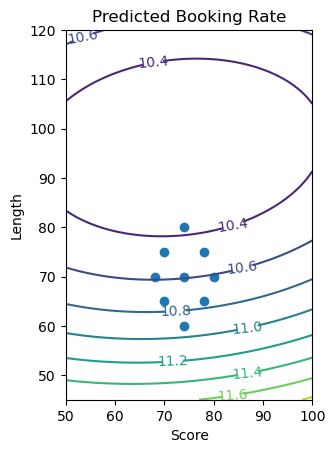

In [56]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 60,  UH=80, UL=60), 
                                 convertNtoC(U = 90, UH=80, UL=60), 100), 
                     np.linspace(convertNtoC(U = 50,  UH=90, UL=50), 
                                 convertNtoC(U = 100,  UH=90, UL=50), 100))



eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2

#pi = np.exp(eta)/(1+np.exp(eta))


h = plt.contour(convertCtoN(x2,  UH=90, UL=50),
                convertCtoN(x1,  UH=95, UL=45), eta)
conditions = response3.drop(columns=['Size', 'Type', 'x1', 'x2', 'Time']).drop_duplicates()
plt.scatter(conditions.Score, conditions.Length, label='first round')

plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Score')
plt.ylabel('Length')
plt.title('Predicted Booking Rate')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [57]:
results_csv_file_path4 = "RESULTS_BLCKMRKT_CumCondCount=17_2024-01-19.csv"

response4 = pd.read_csv(f"~/Downloads/exp4/{results_csv_file_path4}")
response4


response4 = response4.rename(
    columns={
        column : column.split(".")[1] for column in response4.columns
    }
)
response4.columns
response4.sort_values(by=['Time']).head(20)

,Length,Score,Size,Type,Time
215,75,75,0.2,TT,7.650385
199,75,75,0.2,TT,7.680122
73,75,73,0.2,TT,7.829596
264,80,73,0.2,TT,7.847974
265,75,73,0.2,TT,7.872395
175,75,75,0.2,TT,8.022085
53,75,73,0.2,TT,8.075144
374,70,73,0.2,TT,8.131644
377,75,73,0.2,TT,8.257623
224,80,73,0.2,TT,8.468867


In [58]:
response4.groupby(["Score", "Length"]).mean("Time")

Size       Time
Score Length                 
73    70       0.2  10.521104
      75       0.2  10.190853
      80       0.2  10.329073
75    75       0.2  10.185624

In [59]:
df4=pd.concat([response4, response3], axis=0)
len(df4)
x1 = convertNtoC(U=df4['Length'], UH=80, UL=60)
x2 = convertNtoC(U=df4['Score'], UH=80, UL=68)
df4['x1'] = x1
df4['x2'] = x2
df4.groupby(['Length','Score']).mean()
model = smf.ols('Time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df4).fit()
model.summary()
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Mean Browsing Time is optimized when x1=", x_s[0], "and x2=", x_s[1])


Mean Browsing Time is optimized when x1= [[0.79855975]] and x2= [[0.10429908]]


/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/4061067878.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4.groupby(['Length','Score']).mean()


In [60]:

xsN_1 = convertCtoN(x = x_s[0], UH=80, UL=60)
xsN_2 = convertCtoN(x = x_s[1], UH=80, UL=68)
print("Length=", xsN_1, ", Score=", xsN_2)


Length= [[77.98559753]] , Score= [[74.62579447]]


In [61]:

eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(np.exp(eta_s)/(1+np.exp(eta_s)))


[[0.99996393]]


In [62]:

yhat = model.predict(exog=dict(x1=convertNtoC(U = 80, UH=80, UL=60), 
                               x2=convertNtoC(U = 75,  UH=80, UL=68)))
print(yhat)

0    10.247298
dtype: float64


In [63]:
results_csv_file_path5 = "RESULTS_BLCKMRKT_CumCondCount=19_2024-01-19.csv"

response5 = pd.read_csv(f"~/Downloads/exp5/{results_csv_file_path5}")
response5


response5 = response5.rename(
    columns={
        column : column.split(".")[1] for column in response5.columns
    }
)
response5.columns
response5.sort_values(by=['Time']).head(20)


,Length,Score,Size,Type,Time
194,75,74,0.2,TT,7.382579
119,80,75,0.2,TT,7.652427
158,75,74,0.2,TT,7.678789
46,75,74,0.2,TT,7.832667
183,80,75,0.2,TT,7.874488
114,75,74,0.2,TT,8.090498
67,80,75,0.2,TT,8.149265
5,80,75,0.2,TT,8.198905
182,75,74,0.2,TT,8.223424
81,80,75,0.2,TT,8.290633


In [64]:
response5.groupby(["Score", "Length"]).mean("Time")

,,Size,Time
Score,Length,,
74,75,0.2,10.099106
75,80,0.2,10.186486


In [65]:
df5=pd.concat([response4, response3, response5], axis=0)
len(df5)
x1 = convertNtoC(U=df5['Length'], UH=80, UL=60)
x2 = convertNtoC(U=df5['Score'], UH=80, UL=68)
df5['x1'] = x1
df5['x2'] = x2
df5.groupby(['Length','Score']).mean()
model = smf.ols('Time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df5).fit()
model.summary()


/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/2950715527.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5.groupby(['Length','Score']).mean()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     44.91
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.76e-43
Time:                        16:43:51   Log-Likelihood:                -2139.7
No. Observations:                1500   AIC:                             4291.
Df Residuals:                    1494   BIC:                             4323.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4714      0.053    196.336      0.000      10.367      10.576
x1            -0.6891      0.048    -14.236      0.000      -0.784      -0.594
x2             0.0101      0.051      0.197      0.844      -0.090       0.110
x1:x2         -0.0819      0.141     -0.580      0.562      -0.359       0.195
I(x1 ** 2)     0.4415      0.080      5.548      0.000       0.285       0.598
I(x2 ** 2)     0.2103      0.088      2.377      0.018       0.037       0.384
==============================================================================
Omnibus:                        0.130   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.115
Skew:                           0.021   Prob(JB):                        0.944
Kurtosis:                       3.003   Cond. No.                         6.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Mean Browsing Time is optimized when x1=", x_s[0], "and x2=", x_s[1])


Mean Browsing Time is optimized when x1= [[0.792483]] and x2= [[0.13029358]]


In [67]:


xsN_1 = convertCtoN(x = x_s[0], UH=80, UL=60)
xsN_2 = convertCtoN(x = x_s[1], UH=80, UL=68)
print("Length=", xsN_1, ", Score=", xsN_2)


Length= [[77.92482999]] , Score= [[74.78176149]]


In [68]:


eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(np.exp(eta_s)/(1+np.exp(eta_s)))


yhat = model.predict(exog=dict(x1=convertNtoC(U = 80, UH=80, UL=60), 
                               x2=convertNtoC(U = 75,  UH=80, UL=68)))
print(yhat)

[[0.9999628]]
0    10.217711
dtype: float64


In [69]:
df5.groupby(['Length','Score']).mean()


/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/2795024684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5.groupby(['Length','Score']).mean()


Size       Time   x1        x2
Length Score                                
60     74      0.2  11.563947 -1.0  0.000000
65     70      0.2  10.990166 -0.5 -0.666667
       78      0.2  11.057552 -0.5  0.666667
70     68      0.2  10.683007  0.0 -1.000000
       73      0.2  10.521104  0.0 -0.166667
       74      0.2  10.619180  0.0  0.000000
       80      0.2  10.691765  0.0  1.000000
75     70      0.2  10.306197  0.5 -0.666667
       73      0.2  10.190853  0.5 -0.166667
       74      0.2  10.099106  0.5  0.000000
       75      0.2  10.185624  0.5  0.166667
       78      0.2  10.322490  0.5  0.666667
80     73      0.2  10.329073  1.0 -0.166667
       74      0.2  10.273886  1.0  0.000000
       75      0.2  10.186486  1.0  0.166667

In [71]:
results_csv_file_path6 = "RESULTS_BLCKMRKT_CumCondCount=21_2024-01-19.csv"

response6 = pd.read_csv(f"~/Downloads/exp6/{results_csv_file_path6}")
response6


response6 = response6.rename(
    columns={
        column : column.split(".")[1] for column in response6.columns
    }
)
response6.columns
response6.sort_values(by=['Time']).head(20)


,Length,Score,Size,Type,Time
66,80,76,0.2,TT,7.856949
144,80,76,0.2,TT,8.201494
21,80,77,0.2,TT,8.529946
20,80,76,0.2,TT,8.682625
47,80,77,0.2,TT,8.688767
115,80,77,0.2,TT,8.849346
87,80,77,0.2,TT,8.867825
150,80,76,0.2,TT,8.912117
7,80,77,0.2,TT,8.989475
145,80,77,0.2,TT,8.994473


In [72]:

response6.groupby(["Score", "Length"]).mean("Time")

,,Size,Time
Score,Length,,
76,80,0.2,10.646209
77,80,0.2,10.628726


In [76]:
df6=pd.concat([response4, response3, response5, response6], axis=0)
len(df6)
x1 = convertNtoC(U=df6['Length'], UH=80, UL=60)
x2 = convertNtoC(U=df6['Score'], UH=80, UL=68)
df6['x1'] = x1
df6['x2'] = x2
df6.groupby(['Length','Score']).mean()
model = smf.ols('Time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df6).fit()
model.summary()


/var/folders/f_/79l6t2dx0fs3c256t2sfg0lh0000gn/T/ipykernel_49610/1171119014.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df6.groupby(['Length','Score']).mean()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     42.65
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.70e-41
Time:                        16:47:35   Log-Likelihood:                -2422.4
No. Observations:                1700   AIC:                             4857.
Df Residuals:                    1694   BIC:                             4889.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4323      0.052    200.397      0.000      10.330      10.534
x1            -0.6472      0.047    -13.777      0.000      -0.739      -0.555
x2             0.0377      0.050      0.748      0.454      -0.061       0.137
x1:x2          0.1791      0.119      1.502      0.133      -0.055       0.413
I(x1 ** 2)     0.5412      0.075      7.248      0.000       0.395       0.688
I(x2 ** 2)     0.2657      0.087      3.066      0.002       0.096       0.436
==============================================================================
Omnibus:                        0.032   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.065
Skew:                          -0.005   Prob(JB):                        0.968
Kurtosis:                       2.971   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
df6.groupby([ "Length","Score"]).mean("Time")

Size       Time   x1        x2
Length Score                                
60     74      0.2  11.563947 -1.0  0.000000
65     70      0.2  10.990166 -0.5 -0.666667
       78      0.2  11.057552 -0.5  0.666667
70     68      0.2  10.683007  0.0 -1.000000
       73      0.2  10.521104  0.0 -0.166667
       74      0.2  10.619180  0.0  0.000000
       80      0.2  10.691765  0.0  1.000000
75     70      0.2  10.306197  0.5 -0.666667
       73      0.2  10.190853  0.5 -0.166667
       74      0.2  10.099106  0.5  0.000000
       75      0.2  10.185624  0.5  0.166667
       78      0.2  10.322490  0.5  0.666667
80     73      0.2  10.329073  1.0 -0.166667
       74      0.2  10.273886  1.0  0.000000
       75      0.2  10.186486  1.0  0.166667
       76      0.2  10.646209  1.0  0.333333
       77      0.2  10.628726  1.0  0.500000

In [78]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Mean Browsing Time is optimized when x1=", x_s[0], "and x2=", x_s[1])


Mean Browsing Time is optimized when x1= [[0.64567814]] and x2= [[-0.2886896]]


In [79]:

xsN_1 = convertCtoN(x = x_s[0], UH=80, UL=60)
xsN_2 = convertCtoN(x = x_s[1], UH=80, UL=68)
print("Length=", xsN_1, ", Score=", xsN_2)


Length= [[76.4567814]] , Score= [[72.26786242]]


In [80]:

eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(np.exp(eta_s)/(1+np.exp(eta_s)))


[[0.99996349]]


In [83]:


yhat = model.predict(exog=dict(x1=convertNtoC(U = 75, UH=80, UL=60), 
                               x2=convertNtoC(U = 72,  UH=80, UL=68)))
print(yhat)


0    10.231112
dtype: float64


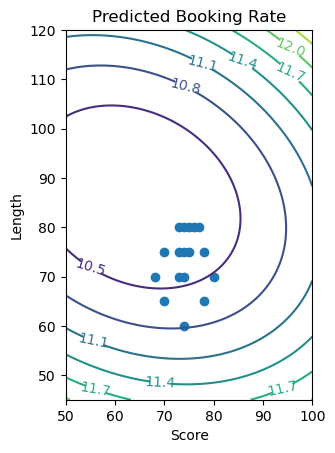

In [88]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 60,  UH=80, UL=60), 
                                 convertNtoC(U = 90, UH=80, UL=60), 100), 
                     np.linspace(convertNtoC(U = 50,  UH=90, UL=50), 
                                 convertNtoC(U = 100,  UH=90, UL=50), 100))



eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2

#pi = np.exp(eta)/(1+np.exp(eta))


h = plt.contour(convertCtoN(x2,  UH=90, UL=50),
                convertCtoN(x1,  UH=95, UL=45), eta)
conditions = df6.drop(columns=['Size', 'Type', 'x1', 'x2', 'Time']).drop_duplicates()
plt.scatter(conditions.Score, conditions.Length, label='first round')

plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Score')
plt.ylabel('Length')
plt.title('Predicted Booking Rate')
plt.gca().set_aspect('equal', adjustable='box')

In [91]:
CIstats = df6.groupby(["Score", "Length"])["Time"].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []
import math
for i in CIstats.index:
    m, c, s = CIstats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

CIstats['ci95_hi'] = ci95_hi
CIstats['ci95_lo'] = ci95_lo
print(CIstats)

                   mean  count       std    ci95_hi    ci95_lo
Score Length                                                  
68    70      10.683007    100  1.039164  10.886683  10.479331
70    65      10.990166    100  1.029376  11.191924  10.788409
      75      10.306197    100  0.944726  10.491363  10.121030
73    70      10.521104    100  1.047039  10.726324  10.315884
      75      10.190853    100  1.005528  10.387936   9.993769
      80      10.329073    100  0.960886  10.517407  10.140740
74    60      11.563947    100  0.912467  11.742790  11.385103
      70      10.619180    100  1.043870  10.823779  10.414582
      75      10.099106    100  1.011882  10.297435   9.900777
      80      10.273886    100  0.975581  10.465100  10.082673
75    75      10.185624    100  0.998289  10.381289   9.989960
      80      10.186486    100  0.955089  10.373683   9.999288
76    80      10.646209    100  0.925970  10.827699  10.464719
77    80      10.628726    100  0.997892  10.824313  10